<a href="https://colab.research.google.com/github/olaakintola/WheelSpace/blob/main/busroute1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ROUTE 1 MACHINE LEARNING MODEL, CHRONOLOGICALLY, SMOTE TECHNIQUE, SPLIT DATA BEFORE READING INTO CODELAB

# The machine learning model was created pulling out just a single bus route instead of the entire bus routes. 
# The data were split into training and test dataset chronologically before being read into colab. SMOTE
# sampling technique was used to improve the imbalanced classification. Random Forest classifier was used here.

# Oversampling and Undersampling were also explored

!pip install -q sklearn

In [2]:
%tensorflow_version 2.x

In [3]:
from __future__ import absolute_import, division, print_function,unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
training_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/trainingbusdata.csv")
testing_df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/testingbusdata.csv")

In [5]:
training_df["occupancy"]

0       0.0
1       0.0
2       0.0
3       0.0
4       1.0
       ... 
1076    1.0
1077    0.0
1078    0.0
1079    0.0
1080    NaN
Name: occupancy, Length: 1081, dtype: float64

In [6]:
testing_df["occupancy"]

0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
      ... 
356    0.0
357    0.0
358    0.0
359    0.0
360    NaN
Name: occupancy, Length: 361, dtype: float64

In [7]:
training_df["occupancy"] = training_df["occupancy"].fillna(0).astype(int)

In [8]:
testing_df["occupancy"] = testing_df["occupancy"].fillna(0).astype(int)

In [9]:
training_df["occupancy"]

0       0
1       0
2       0
3       0
4       1
       ..
1076    1
1077    0
1078    0
1079    0
1080    0
Name: occupancy, Length: 1081, dtype: int64

In [10]:
testing_df["occupancy"]

0      0
1      0
2      0
3      0
4      0
      ..
356    0
357    0
358    0
359    0
360    0
Name: occupancy, Length: 361, dtype: int64

In [11]:
training_df.shape

(1081, 6)

In [12]:
testing_df.shape

(361, 6)

In [13]:
training_df.columns

Index(['route', 'times', 'days', 'occupancy', 'departure', 'destination'], dtype='object')

In [14]:
testing_df.columns

Index(['route', 'times', 'days', 'occupancy', 'departure', 'destination'], dtype='object')

In [15]:
training_df.sample(5)

,route,times,days,occupancy,departure,destination
502,1,17:00,tues,0,NaN,NaN
14,1,09:00,tues,0,NaN,NaN
985,1,08:00,wed,0,NaN,NaN
688,1,11:00,wed,0,NaN,NaN
1027,1,14:00,mon,0,NaN,NaN


In [16]:
testing_df.sample(5)

,route,times,days,occupancy,departure,destination
258,1,13:00,tues,0,NaN,NaN
303,1,10:00,mon,0,NaN,NaN
130,1,17:00,mon,0,NaN,NaN
15,1,10:00,tues,0,NaN,NaN
341,1,12:00,thurs,0,NaN,NaN


In [17]:
training_df.fillna('', inplace=True)

In [18]:
testing_df.fillna('', inplace=True)

In [19]:
testing_df.sample(5)

,route,times,days,occupancy,departure,destination
54,1,13:00,fri,0,,
324,1,07:00,wed,0,,
275,1,18:00,wed,0,,
286,1,17:00,thurs,0,,
141,1,16:00,tues,0,,


In [20]:
training_df.sample(5)

,route,times,days,occupancy,departure,destination
455,1,18:00,wed,0,,
622,1,17:00,tues,0,,
706,1,17:00,thurs,0,,
894,1,13:00,fri,0,,
518,1,09:00,thurs,0,,


In [21]:
training_df[training_df.occupancy==1]

,route,times,days,occupancy,departure,destination
4,1,11:00,mon,1,"""Westmoreland Street, stop 319""","""The Village, stop 119"""
6,1,13:00,mon,1,"""DCU St Patrick's, stop 21""","""Temple Street, stop 51"""
20,1,15:00,tues,1,"""Whitehall College, stop 203""","""Wellpark Avenue, stop 85"""
32,1,15:00,wed,1,"""Whitehall Church, stop 1620""","""Westmoreland Street, stop 319"""
66,1,13:00,mon,1,"""Sandymount, stop 387""","""Ringsend Road, stop 395"""
125,1,12:00,mon,1,"""Oldtown Road, stop 229""","""St Patrick's College, stop 7603"""
138,1,13:00,tues,1,"""Whitehall College, stop 203""","""Irishtown Road, stop 357"""
151,1,14:00,wed,1,"""Whitehall Church, stop 1620""","""Dargle Road, stop 18"""
161,1,12:00,thurs,1,"""Shanard Road, stop 224""","""Sandymount, stop 387"""
166,1,17:00,thurs,1,"""Pearse Square, stop 352""","""Townsend Street, stop 340"""


In [22]:
testing_df[testing_df.occupancy==1]

,route,times,days,occupancy,departure,destination
56,1,15:00,fri,1,"""Grand Canal Quay, stop 396""","""Pearse Station, stop 399"""
64,1,11:00,mon,1,"""O'Connell St Upper, stop 278""","""Irishtown Road, stop 371"""
88,1,11:00,wed,1,"""Innisfallen Parade, stop 15""","""Tritonville Road, stop 390"""
98,1,09:00,thurs,1,"""St John's Church, stop 381""","""Dorset Street Upper, stop 52"""
112,1,11:00,fri,1,"""Drumcondra Rail Stn, stop 47""","""Lea Road, stop 384"""
127,1,14:00,mon,1,"""Westmoreland Street, stop 319""","""Grand Canal Quay, stop 396"""
176,1,15:00,fri,1,"""Ringsend Road, stop 354""","""Ringsend, stop 356"""
200,1,15:00,tues,1,"""Westmoreland Street, stop 319""","""Fitzroy Avenue, stop 48"""
260,1,15:00,tues,1,"""Irishtown Road, stop 371""","""Griffith Downs, stop 4432"""
274,1,17:00,wed,1,"""Shanowen Road, stop 230""","""Botanic Avenue, stop 19"""


In [23]:
training_df.drop("departure", axis="columns", inplace=True)

In [24]:
training_df.drop("destination", axis="columns", inplace=True)

In [25]:
testing_df.drop("destination", axis="columns", inplace=True)

In [26]:
testing_df.drop("departure", axis="columns", inplace=True)

In [27]:
testing_df.dtypes

route        object
times        object
days         object
occupancy     int64
dtype: object

In [28]:
training_df.dtypes

route        object
times        object
days         object
occupancy     int64
dtype: object

In [29]:
training_df.head()

,route,times,days,occupancy
0,1,07:00,mon,0
1,1,08:00,mon,0
2,1,09:00,mon,0
3,1,10:00,mon,0
4,1,11:00,mon,1


In [30]:
testing_df.head()

,route,times,days,occupancy
0,1,07:00,mon,0
1,1,08:00,mon,0
2,1,09:00,mon,0
3,1,10:00,mon,0
4,1,11:00,mon,0


In [31]:
#fourth varsion of route 1 trying to fix one hot encoding
X_train_route_1 = training_df.drop("occupancy", axis="columns")
y_train_route_1 = training_df["occupancy"]

Text(0.5, 0, '% occupancy')

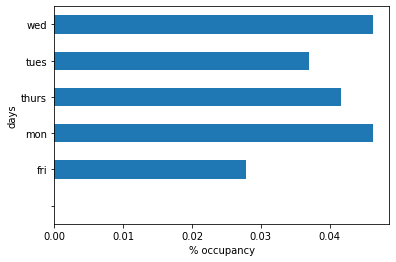

In [32]:
pd.concat([X_train_route_1, y_train_route_1], axis=1).groupby("days").occupancy.mean().plot(kind="barh").set_xlabel("% occupancy")

Text(0.5, 0, '% occupancy')

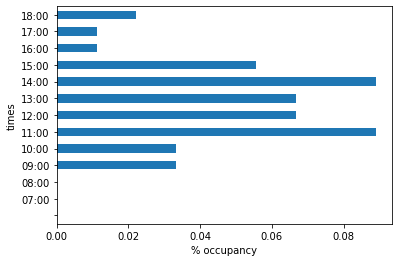

In [33]:
pd.concat([X_train_route_1, y_train_route_1], axis=1).groupby("times").occupancy.mean().plot(kind="barh").set_xlabel("% occupancy")

In [34]:
X_test_route_1 = testing_df.drop("occupancy", axis="columns")
y_test_route_1 = testing_df["occupancy"]

Text(0.5, 0, '% occupancy')

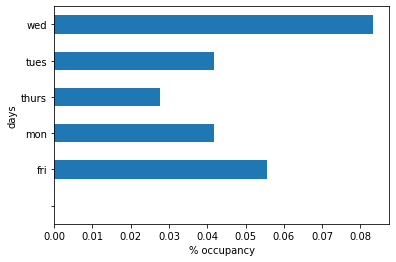

In [35]:
pd.concat([X_test_route_1, y_test_route_1], axis=1).groupby("days").occupancy.mean().plot(kind="barh").set_xlabel("% occupancy")

Text(0.5, 0, '% occupancy')

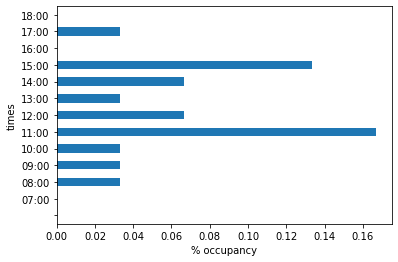

In [36]:
# this plot is for the test datasets which was only done for debugging purposes
pd.concat([X_test_route_1, y_test_route_1], axis=1).groupby("times").occupancy.mean().plot(kind="barh").set_xlabel("% occupancy")

In [38]:
import numpy
unique, counts = numpy.unique(y_train_route_1, return_counts=True)
dict(zip(unique, counts))

{0: 1038, 1: 43}

In [39]:
import numpy
unique, counts = numpy.unique(y_test_route_1, return_counts=True)
dict(zip(unique, counts))

{0: 343, 1: 18}

In [41]:
from sklearn.preprocessing import OneHotEncoder
ohe_1=OneHotEncoder(handle_unknown='ignore')
X_train_hot_route_1=ohe_1.fit_transform(X_train_route_1)
X_test_hot_route_1=ohe_1.transform(X_test_route_1)
#test=ohe.transform(test)

In [77]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy="minority")
X_sm_1, y_sm_1 = smote.fit_sample(X_train_hot_route_1,y_train_route_1)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [78]:
import numpy
unique, counts = numpy.unique(y_sm_1, return_counts=True)
dict(zip(unique, counts))

{0: 1038, 1: 1038}

In [ ]:
#X1df = pd.DataFrame(X_sm_1.todense() )
#y1df = pd.DataFrame(y_sm_1.toarray())

In [ ]:
#pd.concat([X1df, y_sm_1], axis=1).groupby("days").occupancy.mean().plot(kind="barh").set_xlabel("% occupancy")

In [ ]:
#pd.concat([X_sm_1, y_sm_1], axis=1).groupby("times").occupancy.mean().plot(kind="barh").set_xlabel("% occupancy")

In [79]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=3, random_state=0)
#clf.fit(trainingdata_encode_shuffle, train_label_shuffle)
#print(clf.predict([[0, 0, 0, 0]]))
#my second version
#clf.fit(trainingdata_encode, train_label)

#bus_df_encode variables
clf.fit(X_sm_1, y_sm_1)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [80]:
# this is the model predict step
pred_rou_1 = clf.predict(X_test_hot_route_1)

In [81]:
# this is trying to predict the trained set - which was to satisfy my curiosity but not supposed to be done
pred_route_2 = clf.predict(X_train_hot_route_1)

In [82]:
#pred_route_1[:10]

In [83]:
pred_route_2[:10]

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0])

In [84]:
y_test_route_1[:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: occupancy, dtype: int64

In [85]:
# this is result for the classification report
from sklearn.metrics import  confusion_matrix, classification_report

print(classification_report (y_test_route_1, pred_rou_1) )

              precision    recall  f1-score   support

           0       0.96      0.74      0.84       343
           1       0.08      0.44      0.14        18

    accuracy                           0.73       361
   macro avg       0.52      0.59      0.49       361
weighted avg       0.92      0.73      0.80       361



In [86]:
# this is the classification report for when I tried tp predict the training set which I am not supposed to do
from sklearn.metrics import  confusion_matrix, classification_report

print(classification_report (y_train_route_1, pred_route_2) )

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      1038
           1       0.09      0.60      0.16        43

    accuracy                           0.74      1081
   macro avg       0.53      0.68      0.50      1081
weighted avg       0.94      0.74      0.82      1081



In [ ]:
#Another version/combinations of route 
# trying to fix one hot encoding

#X_train_under_1 = training_df.drop("occupancy", axis="columns")
#y_train_under_1 = training_df["occupancy"]

In [87]:
## beginning of undersampling with previous cell as guide
#class count
count_class_0, count_class_1 = training_df.occupancy.value_counts()

#Divide by class
df_class_0 = training_df[training_df["occupancy"]==0]
df_class_1 = training_df[training_df["occupancy"]==1]

In [88]:
#count_class_0 , count_class_1

In [89]:
#df_class_0.shape

In [90]:
#df_class_1.shape

In [91]:
#Oversampling is attempted from here on to see if classification report values would improve

df_over_1 = df_class_1.sample(count_class_0, replace=True) #oversample

df_oversampling = pd.concat([df_class_0, df_over_1], axis=0)

print(df_oversampling.occupancy.value_counts() )

1    1038
0    1038
Name: occupancy, dtype: int64


In [92]:
X_over = df_oversampling.drop("occupancy", axis="columns") #oversampling
y_over = df_oversampling["occupancy"]

In [93]:
y_over.value_counts() #oversampling

1    1038
0    1038
Name: occupancy, dtype: int64

In [94]:
from sklearn.preprocessing import OneHotEncoder #oversampling
ohe_over=OneHotEncoder(handle_unknown='ignore')
X_over_hot=ohe_over.fit_transform(X_over)

In [95]:
from sklearn.ensemble import RandomForestClassifier   #oversampling

clf = RandomForestClassifier(max_depth=3, random_state=0)
#clf.fit(trainingdata_encode_shuffle, train_label_shuffle)
#print(clf.predict([[0, 0, 0, 0]]))
#my second version
#clf.fit(trainingdata_encode, train_label)

#bus_df_encode variables
clf.fit(X_over_hot, y_over)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [96]:
X_test_over = testing_df.drop("occupancy", axis="columns")#oversampling
y_test_over = testing_df["occupancy"]

In [97]:
X_test_over=ohe_over.transform(X_test_over) #oversampling

In [98]:
pred_over = clf.predict(X_test_over) #oversampling

In [99]:
pred_over[:10] #oversampling

array([0, 0, 1, 0, 1, 1, 1, 1, 1, 0])

In [100]:
y_test_over[:10] #oversampling

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: occupancy, dtype: int64

In [101]:
from sklearn.metrics import  confusion_matrix, classification_report #oversampling

print(classification_report (y_test_over, pred_over) )

              precision    recall  f1-score   support

           0       0.97      0.56      0.71       343
           1       0.07      0.67      0.13        18

    accuracy                           0.57       361
   macro avg       0.52      0.61      0.42       361
weighted avg       0.93      0.57      0.68       361



In [102]:
# this step involved undersampling to see if clasification report would be improved
df_class_0_under = df_class_0.sample(count_class_1)

df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)


print(df_test_under.occupancy.value_counts() )

1    43
0    43
Name: occupancy, dtype: int64


In [104]:
X = df_test_under.drop("occupancy", axis="columns")
y = df_test_under["occupancy"]

In [105]:
y.value_counts()

1    43
0    43
Name: occupancy, dtype: int64

In [106]:
from sklearn.preprocessing import OneHotEncoder
ohe_1=OneHotEncoder(handle_unknown='ignore')
X_hot=ohe_1.fit_transform(X)
#X_test_hot_route_1=ohe_1.transform(X_test_route_1)

In [107]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=3, random_state=0)
#clf.fit(trainingdata_encode_shuffle, train_label_shuffle)
#print(clf.predict([[0, 0, 0, 0]]))
#my second version
#clf.fit(trainingdata_encode, train_label)

#bus_df_encode variables
clf.fit(X_hot, y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [108]:
X_test_1 = testing_df.drop("occupancy", axis="columns")
y_test_1 = testing_df["occupancy"]

In [109]:
X_test_hot_1=ohe_1.transform(X_test_1)

In [110]:
pred_under_1 = clf.predict(X_test_hot_1)

In [111]:
pred_under_1[:10]

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0])

In [112]:
y_test_1[:10]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: occupancy, dtype: int64

In [113]:
from sklearn.metrics import  confusion_matrix, classification_report

print(classification_report (y_test_1, pred_under_1) )

              precision    recall  f1-score   support

           0       0.97      0.59      0.74       343
           1       0.08      0.67      0.14        18

    accuracy                           0.60       361
   macro avg       0.53      0.63      0.44       361
weighted avg       0.93      0.60      0.71       361

